<a href="https://colab.research.google.com/github/hyeonsang010716/Deep_Learning/blob/main/1_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install selectivesearch

  Preparing metadata (setup.py) ... done
  Created wheel for selectivesearch: filename=selectivesearch-0.4-py3-none-any.whl size=4335 sha256=27f851c384d67386baf7b0cc6979154291220d6add16d9297117a56fb482516d
  Stored in directory: /root/.cache/pip/wheels/0e/49/95/01447a4e0f48a135ac91fbdb1dd2a1c0523e40e29957b383a3
Successfully built selectivesearch


In [ ]:
!mkdir /content/data
!wget -O /content/data/audrey01.jpg https://github.com/chulminkw/DLCV/blob/72ef30b1104e7d974d8507b78435a74dd9a4300b/data/image/audrey01.jpg?raw=true

mkdir: cannot create directory ‘/content/data’: File exists
--2024-06-28 14:31:04--  https://github.com/chulminkw/DLCV/blob/72ef30b1104e7d974d8507b78435a74dd9a4300b/data/image/audrey01.jpg?raw=true
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/chulminkw/DLCV/raw/72ef30b1104e7d974d8507b78435a74dd9a4300b/data/image/audrey01.jpg [following]
--2024-06-28 14:31:04--  https://github.com/chulminkw/DLCV/raw/72ef30b1104e7d974d8507b78435a74dd9a4300b/data/image/audrey01.jpg
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/chulminkw/DLCV/72ef30b1104e7d974d8507b78435a74dd9a4300b/data/image/audrey01.jpg [following]
--2024-06-28 14:31:04--  https://raw.githubusercontent.com/chulminkw/DLCV/72ef30b1104e7d974d8507b78435a74dd9a4300b/data/image/audrey01.jpg
Res

이미지 로드

img shape (450, 375, 3)


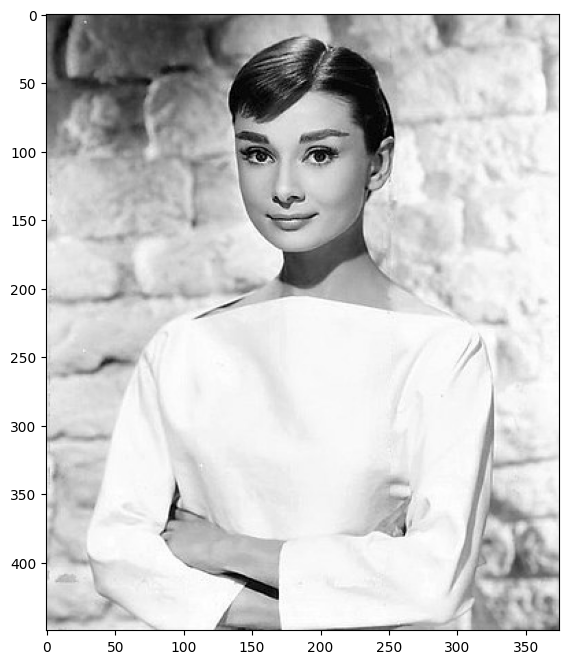

In [ ]:
import cv2
import matplotlib.pyplot as plt
import os
img = cv2.imread('./data/audrey01.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print("img shape" , img.shape)

plt.figure(figsize=(8,8))
plt.imshow(img_rgb)
plt.show()

Selective Search 구현

In [ ]:
import selectivesearch
#scale은 object를 작게 탐색 , min_size는 object를 추천할 때 적어도 X 사이즈 이상을 추천해라
_ , regions = selectivesearch.selective_search(img_rgb , scale = 100 , min_size = 2000)
print(type(regions) , len(regions))

<class 'list'> 41


In [ ]:
regions
#labels = region ID
#size = 크기
#react = 좌표 위치 (start_x , stary_y , x_size , y_size)

[{'rect': (0, 0, 107, 167), 'size': 11166, 'labels': [0.0]},
 {'rect': (15, 0, 129, 110), 'size': 8771, 'labels': [1.0]},
 {'rect': (121, 0, 253, 133), 'size': 17442, 'labels': [2.0]},
 {'rect': (134, 17, 73, 62), 'size': 2713, 'labels': [3.0]},
 {'rect': (166, 23, 87, 176), 'size': 8639, 'labels': [4.0]},
 {'rect': (136, 53, 88, 121), 'size': 4617, 'labels': [5.0]},
 {'rect': (232, 79, 117, 147), 'size': 7701, 'labels': [6.0]},
 {'rect': (50, 91, 133, 123), 'size': 7042, 'labels': [7.0]},
 {'rect': (305, 97, 69, 283), 'size': 11373, 'labels': [8.0]},
 {'rect': (0, 161, 70, 46), 'size': 2363, 'labels': [9.0]},
 {'rect': (72, 171, 252, 222), 'size': 34467, 'labels': [10.0]},
 {'rect': (0, 181, 118, 85), 'size': 5270, 'labels': [11.0]},
 {'rect': (106, 210, 89, 101), 'size': 2868, 'labels': [12.0]},
 {'rect': (302, 228, 66, 96), 'size': 2531, 'labels': [13.0]},
 {'rect': (0, 253, 92, 134), 'size': 7207, 'labels': [14.0]},
 {'rect': (153, 270, 173, 179), 'size': 10360, 'labels': [15.0]},


In [ ]:
#좌표 정보들
cand_rects = [cand['rect'] for cand in regions if cand['size'] > 10000]
print(cand_rects)

[(0, 0, 107, 167), (121, 0, 253, 133), (305, 97, 69, 283), (72, 171, 252, 222), (153, 270, 173, 179), (0, 91, 183, 175), (136, 23, 117, 176), (72, 171, 254, 278), (134, 17, 119, 182), (302, 97, 72, 283), (121, 0, 253, 226), (0, 91, 183, 175), (0, 0, 144, 167), (0, 0, 253, 199), (0, 253, 92, 191), (0, 91, 183, 353), (0, 171, 326, 278), (0, 97, 374, 352), (0, 91, 184, 353), (0, 91, 195, 353), (0, 0, 374, 444), (0, 0, 374, 449), (0, 0, 374, 449), (0, 0, 374, 449)]


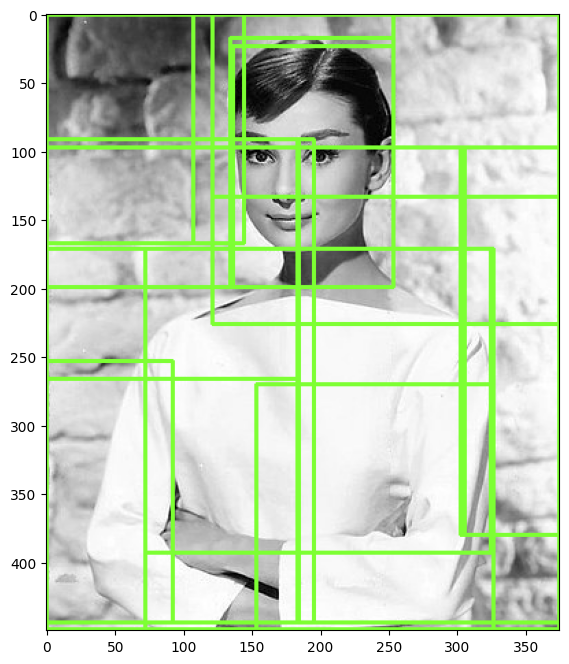

In [ ]:
#Bounding box 색깔
green_rgb = (125, 255 , 51)
img_rgb_copy = img_rgb.copy()
for rect in cand_rects:
  left = rect[0]
  top = rect[1]
  right = rect[0] + rect[2]
  bottom = rect[1] + rect[3]

  img_rgb_copy = cv2.rectangle(img_rgb_copy , (left , top) ,(right , bottom) , color = green_rgb , thickness = 2)
plt.figure(figsize=(8,8))
plt.imshow(img_rgb_copy)
plt.show()

IOU 성능

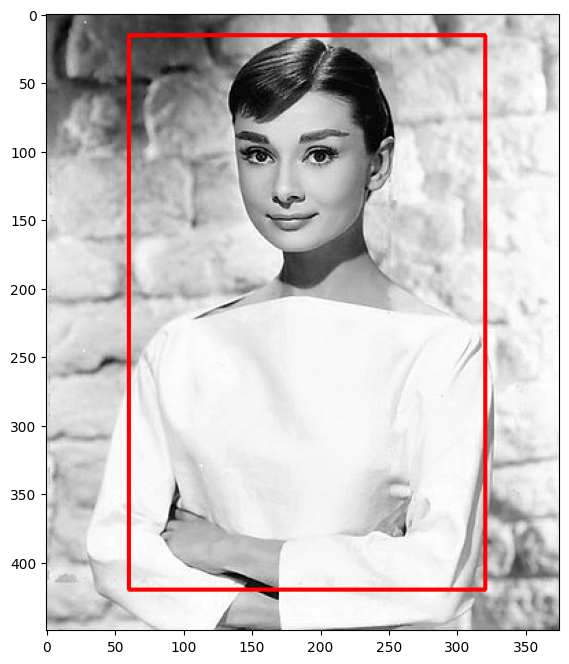

In [ ]:
import numpy as np
gt_box = [60 , 15 , 320 , 420]
red = (255,0,0)
  img_rgb_new = cv2.rectangle(img_rgb , (gt_box[0] , gt_box[1]) , (gt_box[2] , gt_box[3]) , color = red , thickness = 2)
plt.figure(figsize = (8,8))
plt.imshow(img_rgb_new)
plt.show()

In [ ]:
def compute_iou(pred_box , gt_box):
  x1 = np.maximum(pred_box[0] , gt_box[0])
  y1 = np.maximum(pred_box[1] , gt_box[1])
  x2 = np.minimum(pred_box[0] + pred_box[2] , gt_box[0] + gt_box[2])
  y2 = np.minimum(pred_box[1] + pred_box[3] , gt_box[1] + gt_box[3])
  intersection = np.maximum(x2 - x1 , 0) * np.maximum(y2 - y1 , 0)
  pred_area =(pred_box[2] - pred_box[0]) * (pred_box[3] - pred_box[1])
  gt_box_area = (gt_box[2] - gt_box[0]) * (gt_box[3] - gt_box[1])
  union = pred_area + gt_box_area - intersection
  return intersection / union

for index , pred_box in enumerate(cand_rects):
  pred_box = list(pred_box)
  pred_box[2] += pred_box[0]
  pred_box[3] += pred_box[1]
  iou = compute_iou(pred_box , gt_box)
  print("index :",index , "iou :", iou)

index : 0 iou : 0.06157293686705451
index : 1 iou : 0.2819710850932307
index : 2 iou : 0.25483277541542265
index : 3 iou : 1.0172646749737277
index : 4 iou : 0.37905315143909646
index : 5 iou : 0.3127706558834495
index : 6 iou : 0.6278576600806869
index : 7 iou : 0.8595348837209302
index : 8 iou : 0.6275832008614943
index : 9 iou : 0.2654664088931851
index : 10 iou : 0.5068117111352234
index : 11 iou : 0.3127706558834495
index : 12 iou : 0.10952135872362326
index : 13 iou : 0.29560078245307364
index : 14 iou : 0.04975736450003417
index : 15 iou : 0.3316325330950645
index : 16 iou : 0.558645707376058
index : 17 iou : 0.8113074853228963
index : 18 iou : 0.33430515063168126
index : 19 iou : 0.36367907905556207
index : 20 iou : 0.9455390174653704
index : 21 iou : 0.933029586970979
index : 22 iou : 0.933029586970979
index : 23 iou : 0.933029586970979


index : 3 iou : 0.9455390174653704
index : 4 iou : 0.933029586970979
index : 5 iou : 0.933029586970979
index : 6 iou : 0.933029586970979
index : 12 iou : 0.8113074853228963
index : 13 iou : 0.558645707376058
index : 20 iou : 1.0172646749737277
index : 21 iou : 0.8595348837209302
index : 24 iou : 0.5068117111352234
index : 25 iou : 0.6275832008614943
index : 26 iou : 0.6278576600806869
index : 28 iou : 0.5457924281649706


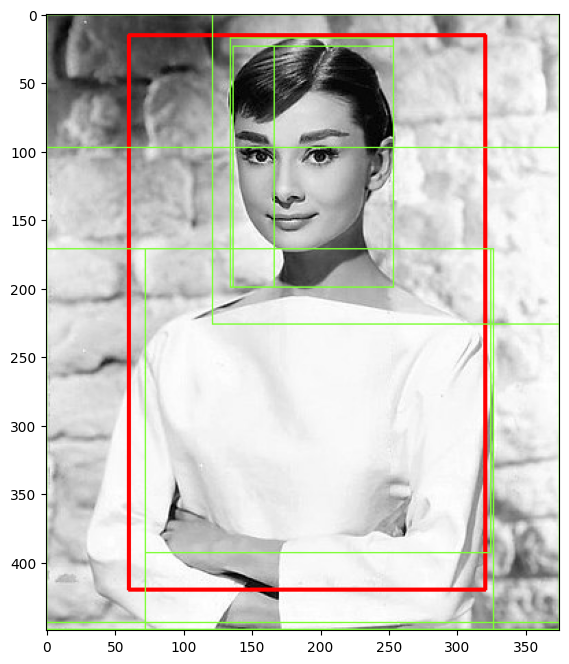

In [ ]:
cand_rects = [cand['rect'] for cand in regions if cand['size'] > 5000]
cand_rects.sort()
for index , pred_box in enumerate(cand_rects):
  pred_box = list(pred_box)
  pred_box[2] += pred_box[0]
  pred_box[3] += pred_box[1]
  iou = compute_iou(pred_box , gt_box)
  if iou > 0.5 :
    print("index :",index , "iou :", iou)
    cv2.rectangle(img_rgb , (pred_box[0] , pred_box[1]) , (pred_box[2] , pred_box[3]) , color = green_rgb , thickness = 1)


plt.figure(figsize = (8,8))
plt.imshow(img_rgb)
plt.show()